In [166]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
from sklearn.metrics import mean_squared_error

In [2]:
image = imread('parrots.jpg')

In [7]:
image = img_as_float(image)

In [10]:
image

array([[[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.01568627],
        [ 0.        ,  0.20784314,  0.01568627],
        [ 0.01960784,  0.21176471,  0.02745098]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.01568627],
        [ 0.        ,  0.20392157,  0.01568627],
        [ 0.00784314,  0.2       ,  0.01568627]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.00392157,  0.20784314,  0.01568627],
        [ 0.        ,  0.20392157,  0.01568627],
        [ 0.00784314,  0.2       ,  0.01568627]],

       ..., 
       [[ 0.4745098 ,  0.38431373,  0.01960784],
        

In [11]:
image.shape

(474, 713, 3)

In [15]:
x = image.reshape((474 * 713, 3))

In [16]:
x

array([[ 0.01176471,  0.49019608,  0.01568627],
       [ 0.01176471,  0.49019608,  0.01568627],
       [ 0.00784314,  0.49411765,  0.00784314],
       ..., 
       [ 0.03921569,  0.08235294,  0.10588235],
       [ 0.09411765,  0.14901961,  0.18431373],
       [ 0.10196078,  0.15294118,  0.21568627]])

In [17]:
x.shape

(337962, 3)

In [18]:
clust = KMeans(init='k-means++', random_state=241)

In [19]:
clust.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=241, tol=0.0001,
    verbose=0)

In [39]:
df = pd.DataFrame(clust.labels_, columns=['cluster'])

In [40]:
df.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [41]:
df.describe()

,cluster
count,337962.000000
mean,3.006258
std,2.437487
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,7.000000


array([[<matplotlib.axes.AxesSubplot object at 0x7f3382b5a610>]], dtype=object)

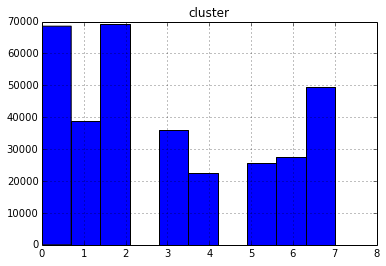

In [42]:
%matplotlib inline
df.hist()

In [96]:
t = np.vstack([clust.labels_, x[:,0], x[:,1], x[:,2]])

In [97]:
t.shape

(4, 337962)

In [98]:
t = t.transpose()

In [99]:
t.shape

(337962, 4)

In [103]:
df = pd.DataFrame(t, columns=['cluster', 'r', 'g', 'b'])

In [105]:
df.head()

,cluster,r,g,b
0,0,0.011765,0.490196,0.015686
1,0,0.011765,0.490196,0.015686
2,0,0.007843,0.494118,0.007843
3,0,0.007843,0.494118,0.007843
4,0,0.007843,0.501961,0.011765


In [147]:
medians = {}
means = {}
for i in range(int(df.cluster.max()) + 1):
    data = df[df.cluster == i].drop('cluster', axis=1)
    means[i] = data.mean().values
    medians[i] = data.median().values

In [148]:
medians

{0: array([ 0.05882353,  0.64313725,  0.02352941]),
 1: array([ 0.79215686,  0.82745098,  0.78823529]),
 2: array([ 0.01176471,  0.07058824,  0.01176471]),
 3: array([ 0.54901961,  0.23529412,  0.03137255]),
 4: array([ 0.78823529,  0.01960784,  0.70196078]),
 5: array([ 0.98431373,  0.84313725,  0.02352941]),
 6: array([ 0.02352941,  0.56078431,  0.58431373]),
 7: array([ 0.44705882,  0.6627451 ,  0.43921569])}

In [146]:
means

{0: array([ 0.09597897,  0.63486899,  0.06795788]),
 1: array([ 0.78725147,  0.82267707,  0.79378648]),
 2: array([ 0.05505457,  0.11793022,  0.05183202]),
 3: array([ 0.60443059,  0.21738663,  0.07027974]),
 4: array([ 0.7746838 ,  0.09204801,  0.68843297]),
 5: array([ 0.95206249,  0.82735973,  0.05119995]),
 6: array([ 0.05160407,  0.54722216,  0.58817256]),
 7: array([ 0.45153159,  0.66719447,  0.44040789])}

In [163]:
mean_df = df.copy()
median_df = df.copy()
for i in range(0, df.shape[0]):
    mean_df.r[i], mean_df.g[i], mean_df.b[i] = means[int(df.cluster[i])]
    median_df.r[i], median_df.g[i], median_df.b[i] = medians[int(df.cluster[i])]

In [164]:
mean_df.head()

,cluster,r,g,b
0,0,0.095979,0.634869,0.067958
1,0,0.095979,0.634869,0.067958
2,0,0.095979,0.634869,0.067958
3,0,0.095979,0.634869,0.067958
4,0,0.095979,0.634869,0.067958


In [165]:
median_df.head()

,cluster,r,g,b
0,0,0.058824,0.643137,0.023529
1,0,0.058824,0.643137,0.023529
2,0,0.058824,0.643137,0.023529
3,0,0.058824,0.643137,0.023529
4,0,0.058824,0.643137,0.023529


In [167]:
def calc_psnr(true, pred):
    return 10.0 * np.log10(1.0 / mean_squared_error(true, pred))

In [170]:
print 'mean: ', calc_psnr(x, mean_df.drop('cluster', axis=1).values)
print 'median: ', calc_psnr(x, median_df.drop('cluster', axis=1).values)

mean:  18.503903736
median:  18.2051976427


In [172]:
for n in range(9, 21):
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=241)
    kmeans.fit(x)
    t = np.vstack([kmeans.labels_, x[:,0], x[:,1], x[:,2]])
    t = t.transpose()
    df = pd.DataFrame(t, columns=['cluster', 'r', 'g', 'b'])
    medians = {}
    means = {}
    for i in range(int(df.cluster.max()) + 1):
        data = df[df.cluster == i].drop('cluster', axis=1)
        means[i] = data.mean().values
        medians[i] = data.median().values
        median_df = df.copy()
        mean_df = df.copy()
    for i in range(0, df.shape[0]):
        mean_df.r[i], mean_df.g[i], mean_df.b[i] = means[int(df.cluster[i])]
        median_df.r[i], median_df.g[i], median_df.b[i] = medians[int(df.cluster[i])]
    print 'N: %d' % n 
    print 'mean: ', calc_psnr(x, mean_df.drop('cluster', axis=1).values)
    print 'median: ', calc_psnr(x, median_df.drop('cluster', axis=1).values)
    print '-' * 50

N: 9
mean:  19.1860918369
median:  18.8885597189
--------------------------------------------------
N: 10
mean:  19.7147709594
median:  19.4522979456
--------------------------------------------------
N: 11
mean:  20.2021405768
median:  19.9357659992
--------------------------------------------------
N: 12
mean:  20.6747040276
median:  20.3859257407
--------------------------------------------------
N: 13
mean:  21.0985663426
median:  20.8754037424
--------------------------------------------------
N: 14
mean:  21.4041081716
median:  21.2010570452
--------------------------------------------------


KeyboardInterrupt: 